In [186]:
from datetime import datetime
import pandas as pd
import matplotlib.pyplot as plt
import statistics
import numpy as np

In [234]:
data = pd.read_csv("./test results/test_2_1/3000.csv", converters={'Datetime': str.strip, 'Transaction ID': str.strip, 'Status': str.strip})

In [235]:
# Preview data
data.head()

,Datetime,Transaction ID,Status
0,04-15-2019 16:05:42.755285,1f336ca9cc6b5e2ef4eef56542e27d9d62cb440fdcee12...,REQ
1,04-15-2019 16:05:42.755768,1f336ca9cc6b5e2ef4eef56542e27d9d62cb440fdcee12...,INIT
2,04-15-2019 16:05:42.960406,1f336ca9cc6b5e2ef4eef56542e27d9d62cb440fdcee12...,ACC
3,04-15-2019 16:05:46.756027,469c94d9fbef0f60d22ca7baa447d60193cb5635456fba...,REQ
4,04-15-2019 16:05:46.756468,469c94d9fbef0f60d22ca7baa447d60193cb5635456fba...,INIT


In [236]:
status = data["Status"].unique()
history = {}
for i in status:
    history[i] = {}
print(history)

{'REQ': {}, 'INIT': {}, 'ACC': {}}


In [237]:
for key,rows in data.iterrows():
    history[rows["Status"]][rows["Transaction ID"]] = rows["Datetime"]    

In [238]:
for i in status:
    for key,value in history[i].items():
        try: # correct format 
            history[i][key] = datetime.utcnow().strptime(value, "%m-%d-%Y %H:%M:%S.%f")
        except ValueError: # Format in nanoseconds, truncate it
            history[i][key] = datetime.utcnow().strptime(value[:26], "%m-%d-%Y %H:%M:%S.%f")
        except TypeError:
            continue
    # requested[key] = datetime.utcnow().strptime(value[:-3], "%d-%m-%Y %H:%M:%S.%f")

In [239]:
time_from_init = {}
time_from_req = {}
time_from_req_to_init = {}
for transactionID, time in history['ACC'].items():
    #print(transactionID)
    req_time = history['REQ'][transactionID]
    init_time = history['INIT'][transactionID]
    time_from_init[transactionID] = (time-init_time).total_seconds()*1000
    time_from_req[transactionID] = (time-req_time).total_seconds()*1000
    time_from_req_to_init[transactionID] = (init_time-req_time).total_seconds()*1000

In [240]:
list_time_from_init = list(time_from_init.values())[1:]
list_time_from_req = list(time_from_req.values())[1:]

In [241]:
def movingaverage(interval, window_size):
    cumsum_vec = np.cumsum(np.insert(interval, 0, 0)) 
    ma_vec = (cumsum_vec[window_size:] - cumsum_vec[:-window_size]) / window_size
    return ma_vec

Mean:  182.22708008008007  ms
Standard Deviation:  45.145152901752795  ms


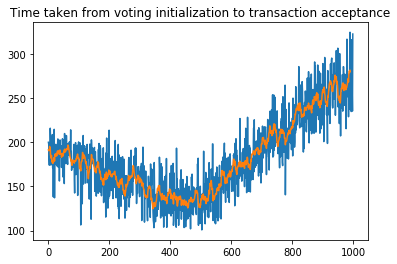

In [242]:
plt.title('Time taken from voting initialization to transaction acceptance')
plt.plot(list_time_from_init)
x_av = movingaverage(list_time_from_init, 10)
plt.plot(x_av)
print("Mean: ",statistics.mean(list_time_from_init)," ms")
print("Standard Deviation: ",statistics.stdev(list_time_from_init)," ms")

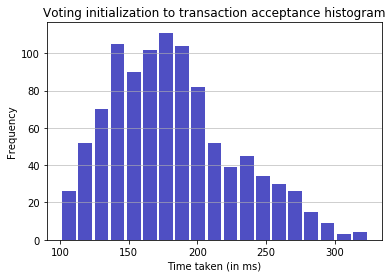

In [243]:
hist, bin_edges = np.histogram(list_time_from_init)
n, bins, patches = plt.hist(x=list_time_from_init, bins='auto', 
                            color='#0504aa', alpha=0.7, rwidth=0.85) # color-related params
plt.grid(axis='y', alpha=0.75)
plt.xlabel('Time taken (in ms)')
plt.ylabel('Frequency')
plt.title('Voting initialization to transaction acceptance histogram')
maxfreq = n.max()
# Set a clean upper y-axis limit.
#plt.ylim(ymax=np.ceil(maxfreq / 10) * 10 if maxfreq % 10 else maxfreq + 10)

Mean:  182.6041901901902  ms
Standard Deviation:  45.07453499598273  ms


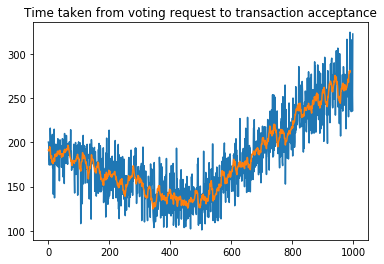

In [244]:
plt.title('Time taken from voting request to transaction acceptance')
plt.plot(list_time_from_req)
x_av = movingaverage(list_time_from_init, 10)
plt.plot(x_av)
print("Mean: ",statistics.mean(list_time_from_req)," ms")
print("Standard Deviation: ",statistics.stdev(list_time_from_req)," ms")

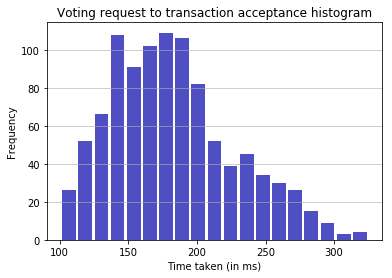

In [245]:
hist, bin_edges = np.histogram(list_time_from_req)
n, bins, patches = plt.hist(x=list_time_from_req, bins='auto', 
                            color='#0504aa', alpha=0.7, rwidth=0.85) # color-related params
plt.grid(axis='y', alpha=0.75)
plt.xlabel('Time taken (in ms)')
plt.ylabel('Frequency')
plt.title('Voting request to transaction acceptance histogram')
maxfreq = n.max()
# Set a clean upper y-axis limit.
#plt.ylim(ymax=np.ceil(maxfreq / 10) * 10 if maxfreq % 10 else maxfreq + 10)